# Librerias

Importamos las librerias que usaremos durante el proyecto.

In [ ]:
#Importamos librerias
import sqlite3
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#Importat Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Crear conexión en memoria para evitar almacenar archivos innecesarios.
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Creación de tablas

In [ ]:
#¡¡¡CAMBIAR LAS RUTAS CADA UNO A LAS SUYAS!!!
#Añadimos las rutas al archivo CSV en Google Drive de las tablas a añadir.
# cloudiness = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/cloudiness.csv'
# dates = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/dates_bueno.csv'
# observations = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/observations.csv'
# weather = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/weather.csv'
# seasons = '/content/drive/MyDrive/Máster IABD/BD/Proyecto 1 BD/Datos/seasons.csv'

# ORIOL
# cloudiness = '/content/drive/MyDrive/Master/P3/Datos/cloudiness.csv'
# dates = '/content/drive/MyDrive/Master/P3/Datos/dates.csv'
# observations = '/content/drive/MyDrive/Master/P3/Datos/observations.csv'
# weather = '/content/drive/MyDrive/Master/P3/Datos/weather.csv'

#JOAN PAU
cloudiness = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/cloudiness.csv'
dates = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/dates_bueno.csv'
observations = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/observations.csv'
weather = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/weather.csv'
seasons = '/content/drive/MyDrive/Colab Notebooks/PRJ03/GrupoBDPRJ03/Datos/seasons.csv'

In [ ]:
#Tabla cloudiness
cursor.execute('''CREATE TABLE IF NOT EXISTS cloudiness (
  cloudiness_id INT PRIMARY KEY, cloudiness VARCHAR(50) NOT NULL )''')
#Tabla dates
cursor.execute('''CREATE TABLE IF NOT EXISTS dates (
  date_id INT PRIMARY KEY, date DATE NOT NULL )''')
#Tabla weather
cursor.execute('''CREATE TABLE IF NOT EXISTS weather (
  weather_id INT PRIMARY KEY, weather VARCHAR(50) NOT NULL )''')
#Tabla seasons
cursor.execute('''CREATE TABLE IF NOT EXISTS seasons (
  season_id INT PRIMARY KEY, season VARCHAR(50) NOT NULL )''')
#Tabla observations
cursor.execute('''CREATE TABLE IF NOT EXISTS observations (
  date_id INT, precipitation FLOAT, temp_max FLOAT, temp_min FLOAT,
  wind FLOAT, humidity FLOAT NOT NULL, pressure FLOAT NOT NULL, solar_radiation FLOAT NOT NULL, visibility FLOAT NOT NULL,
  weather_id INT, cloudiness_id INT, season_id INT, FOREIGN KEY (date_id) REFERENCES dates(date_id), FOREIGN KEY (weather_id) REFERENCES weather(weather_id),
  FOREIGN KEY (cloudiness_id) REFERENCES cloudiness(cloudiness_id), FOREIGN KEY (season_id) REFERENCES seasons(season_id))''')
cursor.execute('''DROP VIEW IF EXISTS weatherData; ''')
cursor.execute('''CREATE VIEW weatherData AS
  SELECT
      d.date AS observation_date,
      o.precipitation,
      o.temp_max,
      o.temp_min,
      o.wind,
      o.humidity,
      o.pressure,
      o.solar_radiation,
      o.visibility,
      w.weather AS weather_description,
      c.cloudiness AS cloudiness_description,
      s.season AS season_description
  FROM
      observations o
  INNER JOIN
      dates d ON o.date_id = d.date_id
  INNER JOIN
      weather w ON o.weather_id = w.weather_id
  INNER JOIN
      cloudiness c ON o.cloudiness_id = c.cloudiness_id
  INNER JOIN
      seasons s ON o.season_id = s.season_id;''')

# Insert de los datos

Tabla Dates

In [ ]:
#Leer el archivo CSV de dates e insertar datos en la tabla.
with open(dates, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO dates (date_id, date)
            VALUES (?, ?)
        ''', (row['date_id'], row['date']))

In [ ]:
# Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM dates')
dates = cursor.fetchall()

dates_df = pd.DataFrame(dates, columns=['date_id', 'date'])

# print("DATES:")
# for date in dates:
#      print(date)
print("DATES DataFrame")
print(dates_df)

DATES DataFrame
       date_id        date
0            1  2016-01-01
1            2  2016-01-02
2            3  2016-01-03
3            4  2016-01-04
4            5  2016-01-05
...        ...         ...
24995    24996  2084-06-07
24996    24997  2084-06-08
24997    24998  2084-06-09
24998    24999  2084-06-10
24999    25000  2084-06-11

[25000 rows x 2 columns]


In [ ]:
# Revisamos en que columnas tenemos datos nulos y cuantos.
# Convertimos la lista a un dataframe
dates_df = pd.DataFrame(dates)
#Convertimos los datos vacíos en NAN
dates_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print(dates_df.isna().sum())

0    0
1    0
dtype: int64


Tabla Cloudiness

In [ ]:
#Leer el archivo CSV de cloudiness e insertar datos en la tabla.
with open(cloudiness, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO cloudiness (cloudiness_id, cloudiness)
            VALUES (?, ?)
        ''', (row['cloudiness_id'], row['cloudiness']))

In [ ]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM cloudiness')
cloudiness = cursor.fetchall()

cloudiness_df = pd.DataFrame(cloudiness, columns=['cloudiness_id', 'cloudiness'])

print("CLOUDINESS DataFrame")
print(cloudiness_df)

CLOUDINESS DataFrame
   cloudiness_id            cloudiness
0              1  parcialmente nublado
1              2              cubierto
2              3             despejado


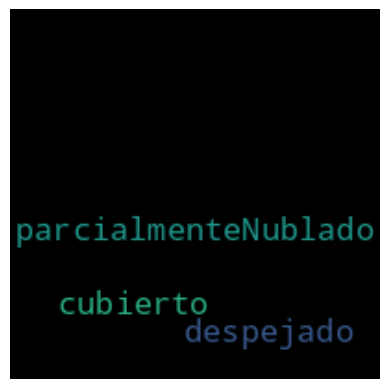

In [ ]:
text=("parcialmenteNublado cubierto despejado")
wordcloud = WordCloud(width=200, height=200, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Tabla Weather

In [ ]:
#Leer el archivo CSV de weather e insertar datos en la tabla.
with open(weather, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO weather (weather_id, weather)
            VALUES (?, ?)
        ''', (row['weather_id'], row['weather']))

In [ ]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM weather')
weather = cursor.fetchall()

weather_df = pd.DataFrame(weather, columns=['weather_id', 'weather'])

print("WEATHER DataFrame")
print(weather_df)

WEATHER DataFrame
   weather_id weather
0           1    rain
1           2   storm
2           3  cloudy
3           4     fog
4           5     sun


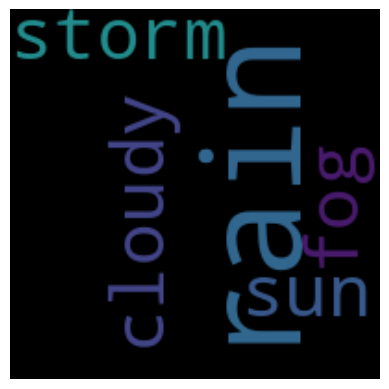

In [ ]:
text=("rain storm cloudy fog sun")
wordcloud = WordCloud(width=200, height=200, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


Tabla Seasons

In [ ]:
#Leer el archivo CSV de seasons e insertar datos en la tabla.
with open(seasons, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO seasons (season_id, season)
            VALUES (?, ?)
        ''', (row['season_id'], row['season']))

In [ ]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM seasons')
season = cursor.fetchall()

season_df = pd.DataFrame(season, columns=['season_id', 'season'])

print("SEASONS DataFrame")
print(season_df)

SEASONS DataFrame
   season_id  season
0          1  Winter
1          2  Spring
2          3  Summer
3          4  Autumn


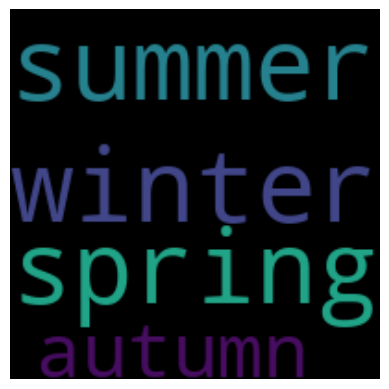

In [ ]:
text=("winter spring summer autumn")
wordcloud = WordCloud(width=200, height=200, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Tabla Observations

In [ ]:
#Leer el archivo CSV de observations e insertar datos en la tabla.
with open(observations, 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file, delimiter=',')
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO observations (date_id, precipitation, temp_max, temp_min, wind, humidity, pressure, solar_radiation,
            visibility, weather_id, cloudiness_id, season_id)
            VALUES (?,?,?,?,?,?,?,?,?,?,?,?)
        ''', (row['date_id'],row['precipitation'], row['temp_max'],row['temp_min'], row['wind'],
              row['humidity'], row['pressure'],row['solar_radiation'], row['visibility'],row['weather_id'], row['cloudiness_id'], row['season_id']))

In [ ]:
#Guardar cambios
conn.commit()

#Consulta sencilla para verificar que los datos fueron insertados correctamente
cursor.execute('SELECT * FROM observations')
observations = cursor.fetchall()

observations_df = pd.DataFrame(observations, columns=['date_id', 'precipitation', 'temp_max', 'temp_min', 'wind',
                                                      'humidity','pressure','solar_radiation','visibility','weather_id','cloudiness_id','season_id'])

print("OBSERVATIONS DataFrame")
observations_df

OBSERVATIONS DataFrame


,date_id,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_id,cloudiness_id,season_id
0,1,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,1,1,1
1,2,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,2,1,1
2,3,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,1,1,1
3,4,11.73331,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,2,1,1
4,5,,,,,93.495408,1040.779759,1171.100262,5.274300,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,40.539998,27.00059,10.745337,6.187005,97.034881,1018.240400,817.076704,16.965235,1,2,3
24996,24997,3.103365,-1.402259,-3.582253,5.157118,73.123314,992.083538,688.916318,13.040280,3,1,3
24997,24998,48.640131,16.889725,11.122101,8.886248,78.533112,1026.385045,163.491340,9.445569,1,1,3
24998,24999,4.801455,4.875335,3.455625,4.452373,81.345812,985.643978,1150.032060,11.963065,3,2,3


# Análisis de los datos

In [ ]:
query = "SELECT * FROM weatherData;"
weatherData = pd.read_sql(query, conn)

#Mostrar el DataFrame resultante
weatherData

,observation_date,precipitation,temp_max,temp_min,wind,humidity,pressure,solar_radiation,visibility,weather_description,cloudiness_description,season_description
0,2016-01-01,44.599483,24.623334,14.194788,6.343068,72.164838,1047.159266,355.719260,2.554031,rain,parcialmente nublado,Winter
1,2016-01-02,42.005045,5.424691,4.754055,1.965057,61.847605,1015.712275,320.128520,16.960026,storm,parcialmente nublado,Winter
2,2016-01-03,40.041807,4.626002,2.752717,8.278839,70.867155,1032.346048,206.294226,5.264422,rain,parcialmente nublado,Winter
3,2016-01-04,11.73331,33.900703,15.585794,4.369015,82.692741,1018.328973,340.829562,1.650444,storm,parcialmente nublado,Winter
4,2016-01-05,,,,,93.495408,1040.779759,1171.100262,5.274300,cloudy,cubierto,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2084-06-07,40.539998,27.00059,10.745337,6.187005,97.034881,1018.240400,817.076704,16.965235,rain,cubierto,Summer
24996,2084-06-08,3.103365,-1.402259,-3.582253,5.157118,73.123314,992.083538,688.916318,13.040280,cloudy,parcialmente nublado,Summer
24997,2084-06-09,48.640131,16.889725,11.122101,8.886248,78.533112,1026.385045,163.491340,9.445569,rain,parcialmente nublado,Summer
24998,2084-06-10,4.801455,4.875335,3.455625,4.452373,81.345812,985.643978,1150.032060,11.963065,cloudy,cubierto,Summer


In [ ]:
weatherData.shape

(25000, 12)

In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   observation_date        25000 non-null  object 
 1   precipitation           25000 non-null  object 
 2   temp_max                25000 non-null  object 
 3   temp_min                25000 non-null  object 
 4   wind                    25000 non-null  object 
 5   humidity                25000 non-null  float64
 6   pressure                25000 non-null  float64
 7   solar_radiation         25000 non-null  float64
 8   visibility              25000 non-null  float64
 9   weather_description     25000 non-null  object 
 10  cloudiness_description  25000 non-null  object 
 11  season_description      25000 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.3+ MB


In [ ]:
weatherData.describe()

,humidity,pressure,solar_radiation,visibility
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,64.847906,1015.151281,598.326883,10.022123
std,20.040558,20.191020,345.311869,5.777390
min,30.002771,980.002367,0.050882,0.000143
25%,47.603790,997.716458,297.583247,5.010516
50%,64.722676,1015.287457,600.082933,10.065241
75%,82.100215,1032.699176,895.885809,15.040712
max,99.991184,1049.996966,1199.912704,19.999839


In [ ]:
#mostrar los datos vacios de cada variable
weatherData.replace([''],np.nan,inplace=True)
weatherData.isnull().sum()

<ipython-input-24-2768328f0443>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherData.replace([''],np.nan,inplace=True)


,0
observation_date,0
precipitation,2500
temp_max,2500
temp_min,2500
wind,2500
humidity,0
pressure,0
solar_radiation,0
visibility,0
weather_description,0


In [ ]:
observations_df.season_id.value_counts()

,count
season_id,
2,6348
3,6267
1,6197
4,6188


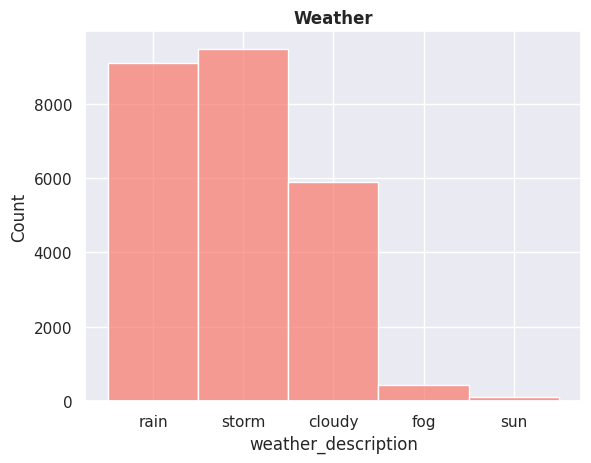

In [ ]:
#Variable season_id
sns.set(style="darkgrid")
# Sort the table
sns.histplot(data=weatherData, x="weather_description", color="salmon").set_title('Weather', fontweight ='bold');

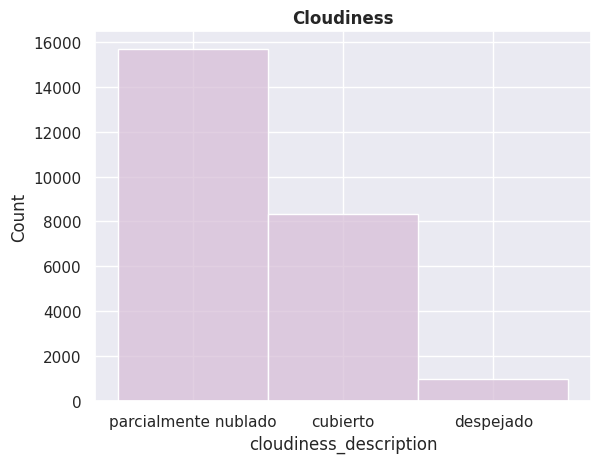

In [ ]:
#Variable cloudiness_id
sns.set(style="darkgrid")
# Sort the table
sns.histplot(data=weatherData, x="cloudiness_description", color="thistle").set_title('Cloudiness', fontweight ='bold');

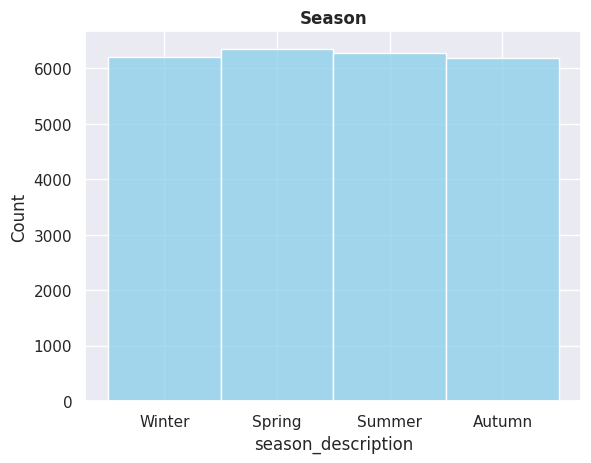

In [ ]:
#Variable season_id
sns.set(style="darkgrid")
# Sort the table
sns.histplot(data=weatherData, x="season_description", color="skyblue").set_title('Season', fontweight ='bold');

In [ ]:
print(dates_df)

           0           1
0          1  2016-01-01
1          2  2016-01-02
2          3  2016-01-03
3          4  2016-01-04
4          5  2016-01-05
...      ...         ...
24995  24996  2084-06-07
24996  24997  2084-06-08
24997  24998  2084-06-09
24998  24999  2084-06-10
24999  25000  2084-06-11

[25000 rows x 2 columns]


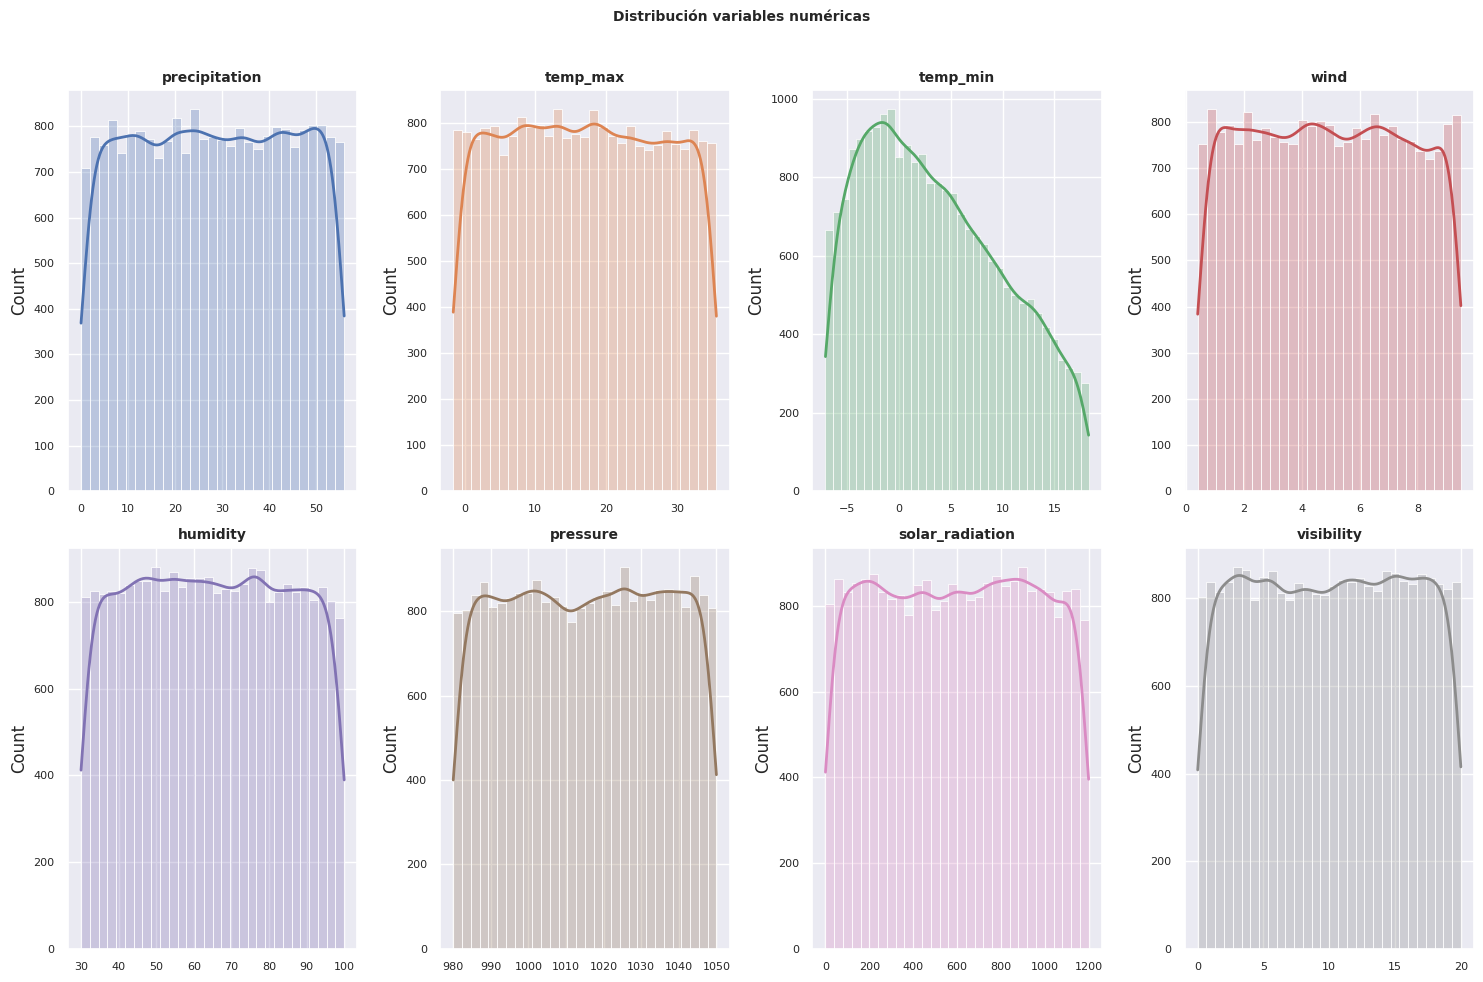

In [ ]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = weatherData.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = weatherData,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

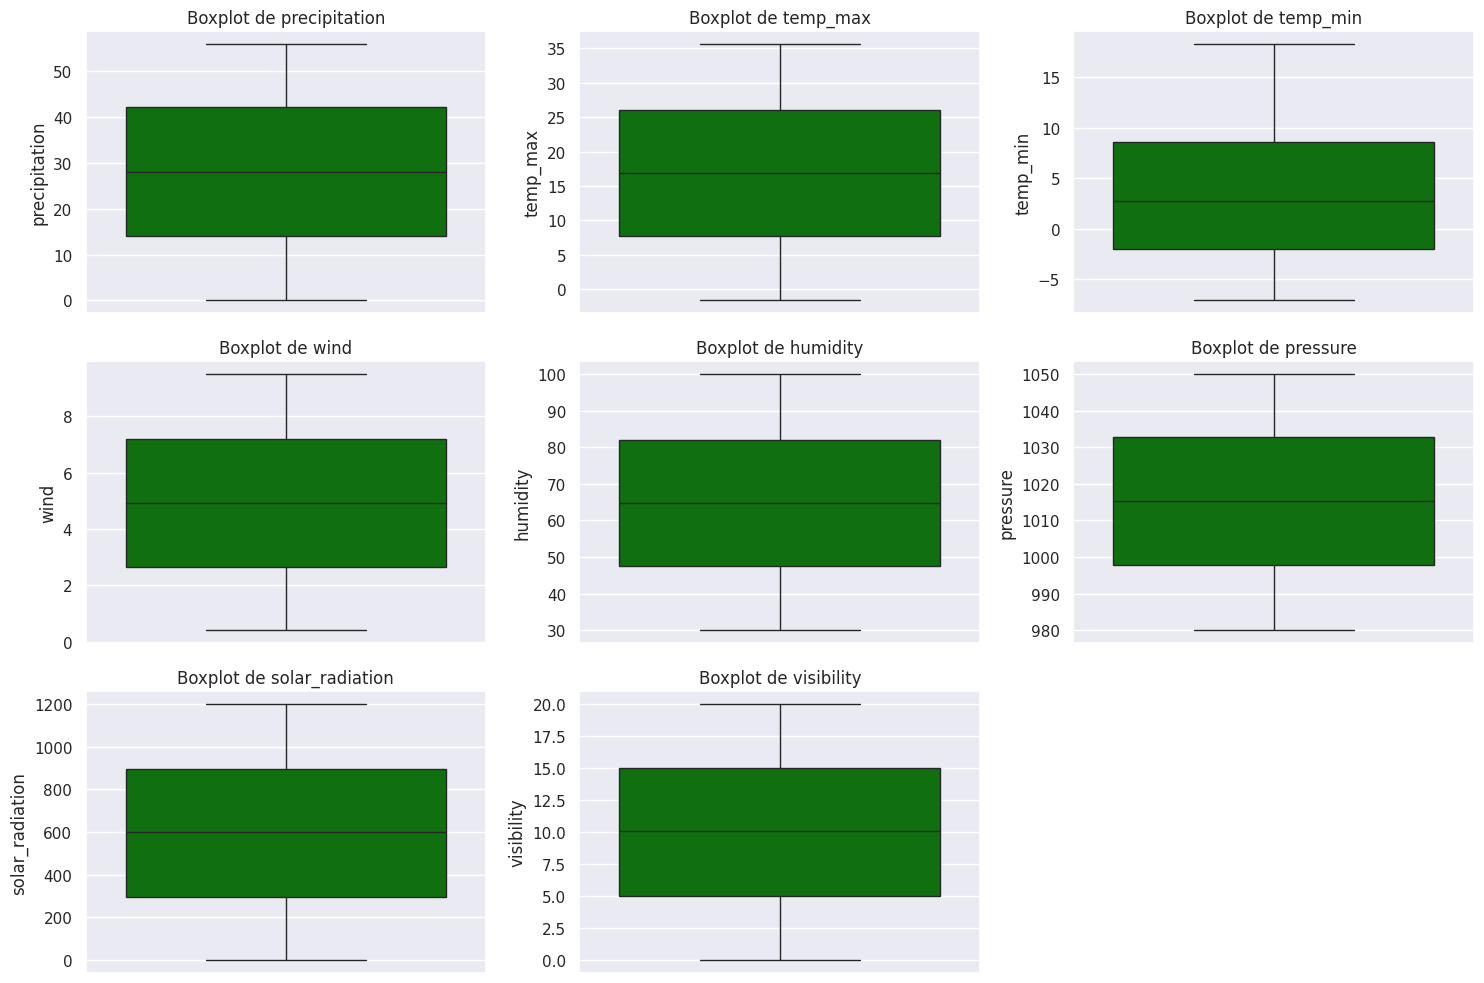

In [ ]:
variables = ['precipitation', 'temp_max', 'temp_min', 'wind', 'humidity', 'pressure', 'solar_radiation', 'visibility']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=weatherData, y=var, color='green')
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
plt.tight_layout()
plt.show()


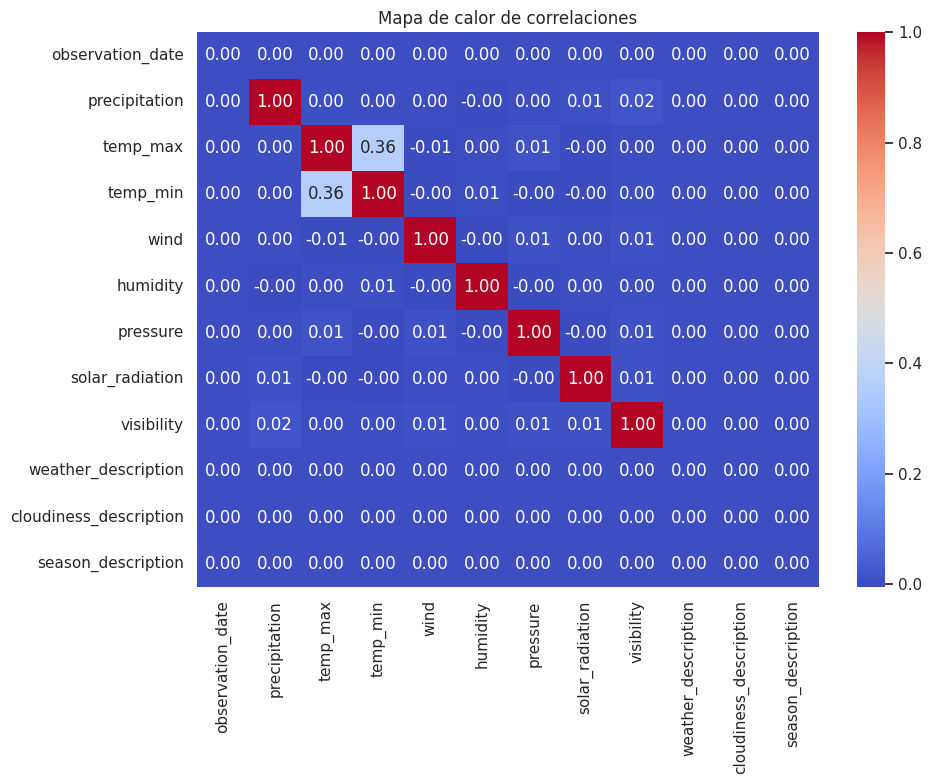

In [ ]:
plt.figure(figsize=(10, 8))

for column in weatherData.columns:
    if weatherData[column].dtype == 'object':
        weatherData[column] = pd.to_numeric(weatherData[column], errors='coerce')  # Convierte a numérico; errores se reemplazan con NaN

# Calcula la matriz de correlación
correlation_matrix = weatherData.corr(numeric_only=True)

# Reemplazar NaN por 0 (opcional, dependiendo de cómo prefieras manejar valores faltantes)
correlation_matrix = correlation_matrix.fillna(0)

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


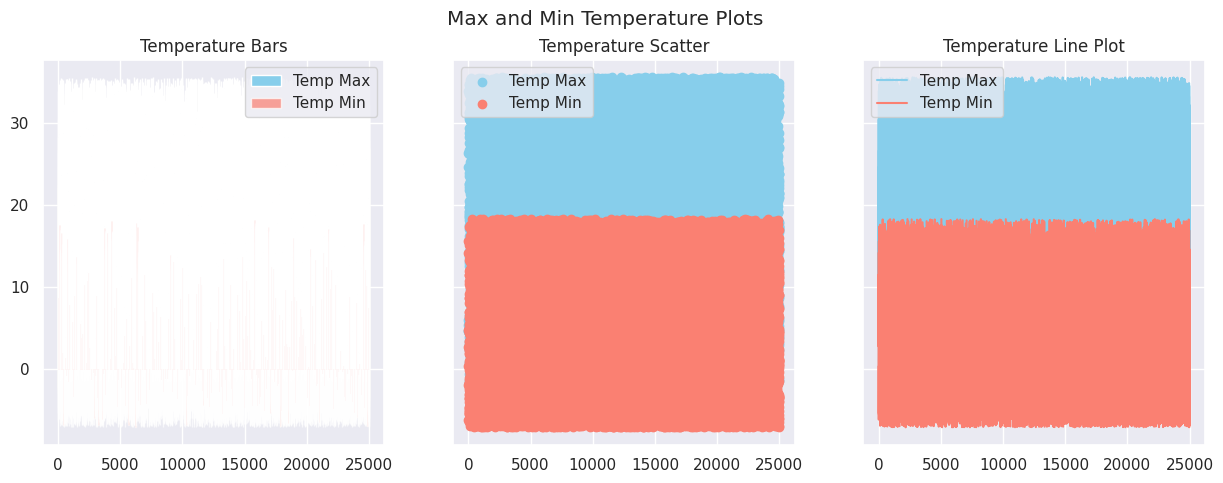

In [ ]:
# Suponiendo que 'names' es una serie o lista con etiquetas de cada fila o un rango de índices
# Aquí se usa un rango en caso de que no tengas etiquetas específicas
names = range(len(weatherData))

# Valores de temp_max y temp_min
temp_max = weatherData['temp_max']
temp_min = weatherData['temp_min']

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Gráfico de barras
axs[0].bar(names, temp_max, color='skyblue', label='Temp Max')
axs[0].bar(names, temp_min, color='salmon', alpha=0.7, label='Temp Min')
axs[0].set_title('Temperature Bars')
axs[0].legend()

# Gráfico de dispersión
axs[1].scatter(names, temp_max, color='skyblue', label='Temp Max')
axs[1].scatter(names, temp_min, color='salmon', label='Temp Min')
axs[1].set_title('Temperature Scatter')
axs[1].legend()

# Gráfico de línea
axs[2].plot(names, temp_max, color='skyblue', label='Temp Max')
axs[2].plot(names, temp_min, color='salmon', label='Temp Min')
axs[2].set_title('Temperature Line Plot')
axs[2].legend()

# Título de la figura
fig.suptitle('Max and Min Temperature Plots')

plt.show()

---

Joan Pau Grau Homs

Oriol Fernández Font

Aakriti Guerrero Bertolin

---

